## create .npy to .png file

In [5]:
import numpy as np 

normal_img = np.load("raw_data/HealthylPart_1.npy")

print(normal_img.shape)

print(normal_img[:,:,:].max(), normal_img[:,:,:].min())

(7986, 128, 128)
1.0 0.0


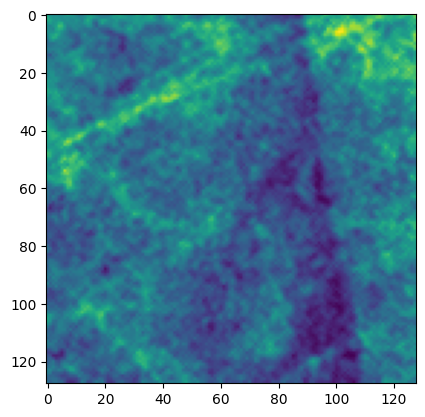

In [46]:
plt.imshow(normal_img[8,:,:])

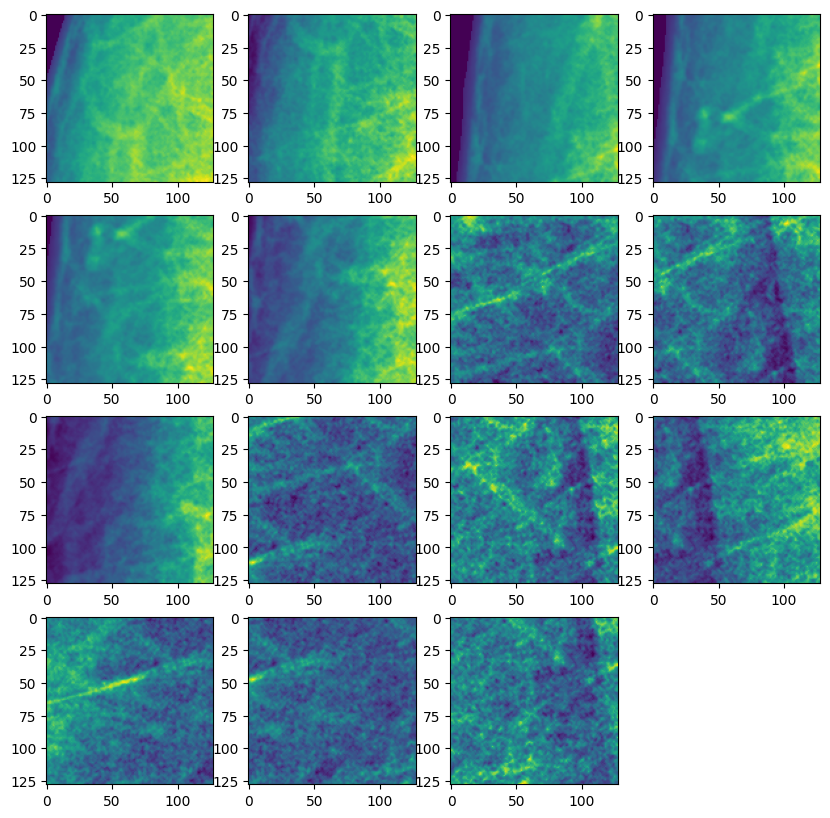

In [3]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
for i in range(1,16):
    plt.subplot(4,4,i)
    plt.imshow(normal_img[i,:,:])


In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

def save_npy_as_png(npy_file, output_dir):
    """
    Save each image in a .npy file as a .png file in the specified output directory.

    Args:
        npy_file (str): Path to the .npy file.
        output_dir (str): Path to the directory where .png files will be saved.
    """
    # Load the .npy file
    data = np.load(npy_file)

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through each image and save as .png file
    for i in range(data.shape[0]):
        image = data[i]
        # Save the image as a .npy file
        np.save(os.path.join(output_dir, f'0_{i}.npy'), image)

    print("Images saved successfully.")

# Example usage:
npy_file = './raw_data/AbnormalPart_1.npy'
output_dir = './datasets/abnormal'
save_npy_as_png(npy_file, output_dir)


Images saved successfully.


## normal 

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

class ImageFolderDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_filenames = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, index):
        img_path = self.image_filenames[index]
        image = np.load(img_path) 
        if self.transform:
            image = self.transform(image)
        return image, image  # Return the same image as both input and target

# Define transformations for grayscale images
transform = transforms.Compose([
    # transforms.Resize((128, 128)),  # Resize all images to the same size
    transforms.ToTensor(),  # Convert images to tensors
])

# Create the dataset
dataset = ImageFolderDataset('/home/sshabani/projects/SDL/pytorch-AE/datasets/size_384/abnormal/test', transform=transform)


/home/sshabani/projects/SDL/pytorch-AE/AE_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Parameters
batch_size = 32
shuffle = True
epochs = 100
# Create the DataLoader
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


In [8]:
# Example training loop
for epoch in range(epochs):
    for img, target in data_loader:
        # Your training code here, e.g., pass 'img' through an autoencoder
        break

print(img.shape, target.shape)

torch.Size([32, 1, 384, 384]) torch.Size([32, 1, 384, 384])


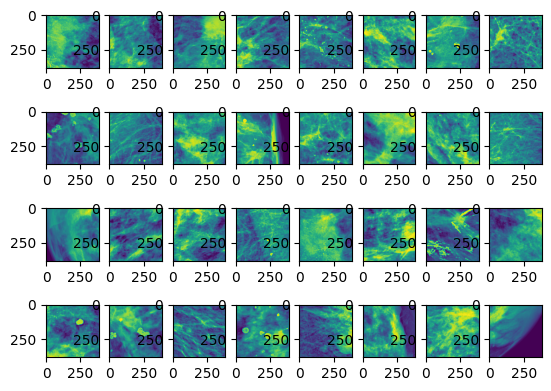

In [9]:
import matplotlib.pyplot as plt 


for i in range(0,32):
    plt.subplot(4,8,i+1)
    plt.imshow(img[i,0,:,:])
# i = 4
# plt.imshow(img[i,0,:,:])
# print(img[i,0,:,:].min(), img[i,0,:,:].max())

## abnormal 

In [4]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import numpy as np 

class ImageFolderDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_filenames = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, index):
        img_path = self.image_filenames[index]
        image = np.load(img_path) 
        if self.transform:
            image = self.transform(image)
        return image, image  # Return the same image as both input and target

# Define transformations for grayscale images
transform = transforms.Compose([
    # transforms.Resize((128, 128)),  # Resize all images to the same size
    transforms.ToTensor(),  # Convert images to tensors
])

# Create the dataset
dataset = ImageFolderDataset('./datasets/abnormal', transform=transform)


In [5]:
# Parameters
batch_size = 8
shuffle = True
epochs = 100
# Create the DataLoader
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


In [6]:
# Example training loop
for epoch in range(epochs):
    for img, target in data_loader:
        # Your training code here, e.g., pass 'img' through an autoencoder
        break

print(img.shape, target.shape)
print(img.min(), img.max())

torch.Size([8, 1, 128, 128]) torch.Size([8, 1, 128, 128])
tensor(0.0228, dtype=torch.float64) tensor(0.9899, dtype=torch.float64)


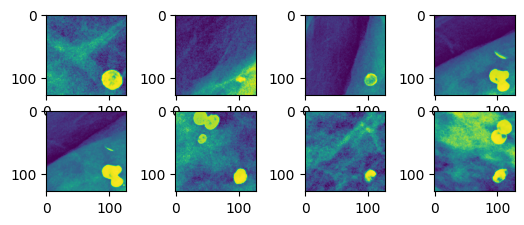

In [7]:
import matplotlib.pyplot as plt 


for i in range(0,8):
    plt.subplot(4,4,i+1)
    plt.imshow(img[i,0,:,:])
# i = 4
# plt.imshow(img[i,0,:,:])
# print(img[i,0,:,:].min(), img[i,0,:,:].max())

## read input and output data 

Text(0.5, 1.0, 'output')

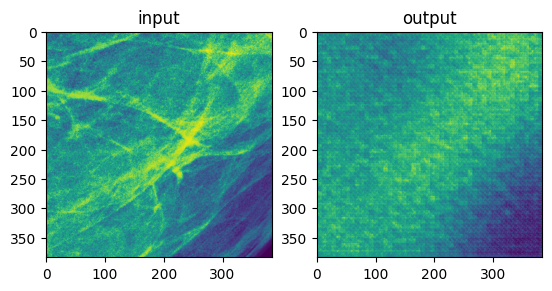

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input_20.npy")
output = np.load("results/test_output_20.npy")

plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

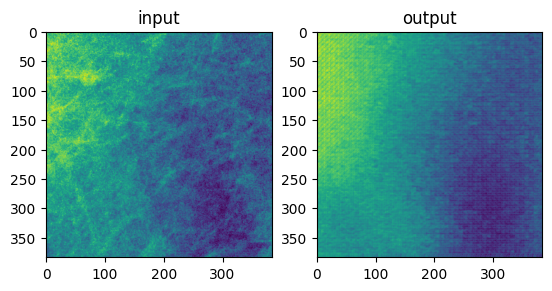

In [9]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input_40.npy")
output = np.load("results/test_output_40.npy")

plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

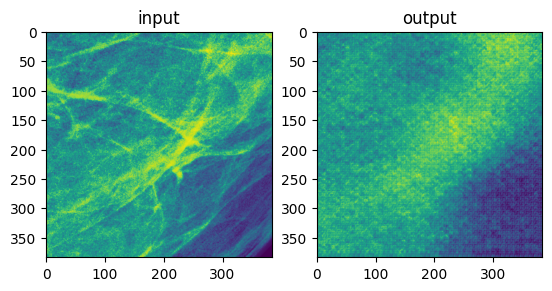

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input_60.npy")
output = np.load("results/test_output_60.npy")

plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

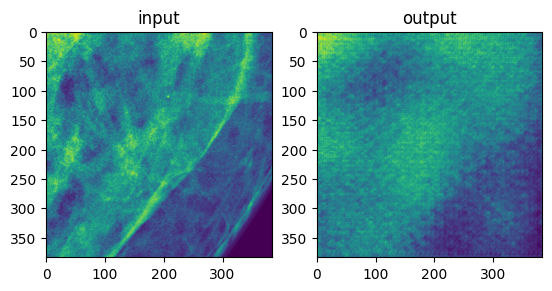

In [11]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input_80.npy")
output = np.load("results/test_output_80.npy")

plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

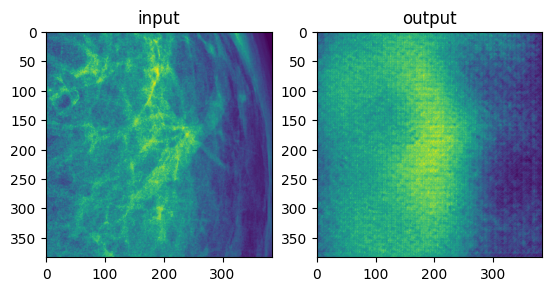

In [12]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input_100.npy")
output = np.load("results/test_output_100.npy")

plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

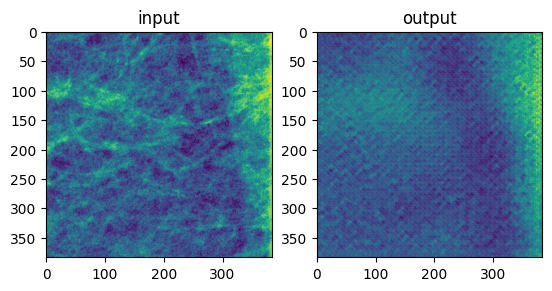

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input_115.npy")
output = np.load("results/test_output_115.npy")

plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

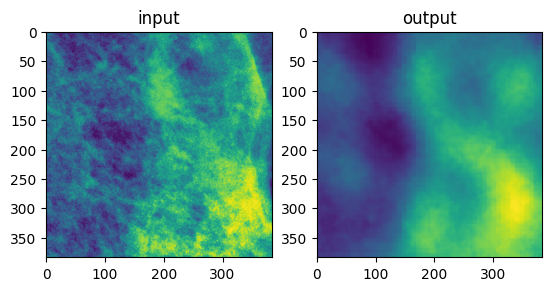

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input.npy")
output = np.load("results/test_output.npy")




plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

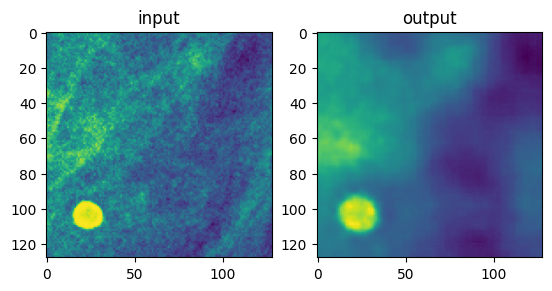

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input.npy")
output = np.load("results/test_output.npy")


plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

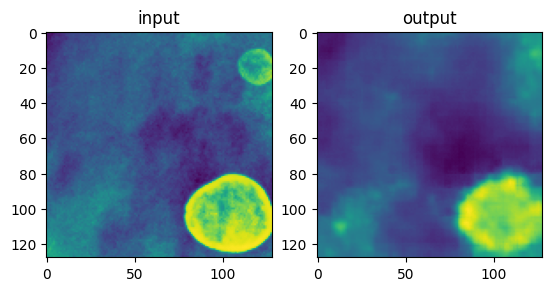

In [6]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input.npy")
output = np.load("results/test_output.npy")


plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

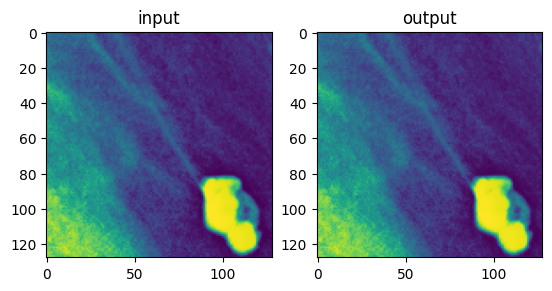

In [12]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input.npy")
output = np.load("results/test_output.npy")


plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

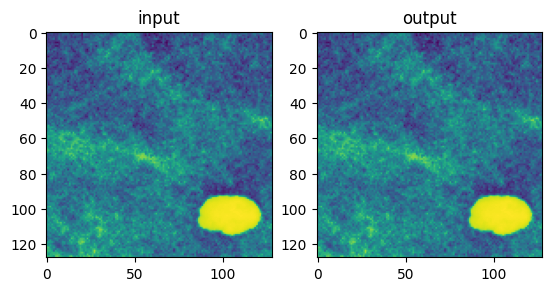

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input.npy")
output = np.load("results/test_output.npy")


plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

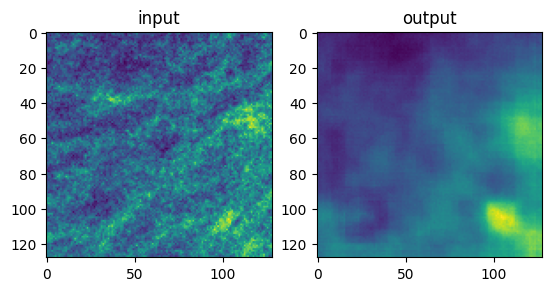

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("results/test_input.npy")
output = np.load("results/test_output.npy")


plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


Text(0.5, 1.0, 'output')

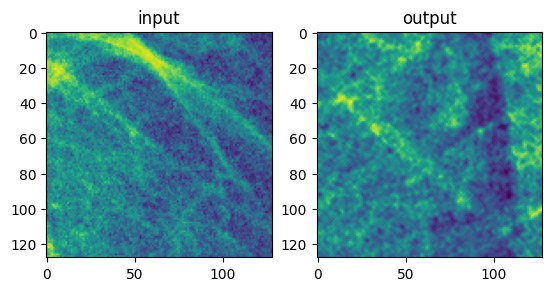

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 

input = np.load("datasets/normal/test/0_303.npy")
output = np.load("datasets/normal/test/0_11.npy")


plt.subplot(1,2,1)
plt.imshow(input)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("output")


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class VGGPerceptualLoss(nn.Module):
    def __init__(self):
        super(VGGPerceptualLoss, self).__init__()
        vgg19 = models.vgg19(pretrained=True).features

        # Define the layers you want to extract
        self.feature_layers = nn.Sequential(
            # Using the output of the first and second blocks as features
            *list(vgg19[:4]),  # ReLU after first conv block
            *list(vgg19[4:9]),  # ReLU after second conv block
        )
        for param in self.feature_layers.parameters():
            param.requires_grad = False  # Freeze all VGG parameters

    def forward(self, input, target):
        # Normalize the images if not already done (VGG is trained on ImageNet stats)
        mean = torch.tensor([0.485, 0.456, 0.406]).to(input.device).view(1, 3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).to(input.device).view(1, 3, 1, 1)
        input_norm = (input - mean) / std
        target_norm = (target - mean) / std

        # Extract features
        input_features = self.feature_layers(input_norm)
        target_features = self.feature_layers(target_norm)

        # Compute perceptual loss using L1 Loss
        loss = nn.L1Loss()(input_features, target_features)
        return loss

# Usage example
# Assume `input_image` and `target_image` are your input tensors of size [N, C, H, W]
# and they are already scaled to [0, 1]
perceptual_loss = VGGPerceptualLoss()
loss = perceptual_loss(input_image, target_image)
print("Perceptual Loss:", loss.item())
